In [36]:
import sys
from pathlib import Path
sys.path.append(str(Path().resolve().parents[0]))
from src.data_loader.load_data import load_portfolio_data
from src.tests.ab_tests import preprocess_data, prepare_ab_groups,check_categorical_balance, check_numeric_balance, calculate_claim_frequency, calculate_claim_severity, test_claim_frequency, test_claim_severity, plot_metric_by_group

In [37]:
# Load data
df = load_portfolio_data("../data/MachineLearningRating_v3.txt")
df = preprocess_data(df)

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\data_loader\load_data.py:4: DtypeWarning: Columns (32,37) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path, sep="|", parse_dates=['TransactionMonth'])


### Hypothesis 2: Risk Differences Across Zip codes
H₀: There are no risk differences between zip codes

In [38]:
# --- Select Two Zip Codes to Compare ---
zip_a = 2000
zip_b = 122
# --- Prepare A/B Data (Feature: ZipCode) ---
df_ab = prepare_ab_groups(df, zip_a, zip_b, feature_col="PostalCode")

In [39]:
# --- Metric Calculations ---
freq_a = calculate_claim_frequency(df_ab[df_ab["Group"] == "A"])
freq_b = calculate_claim_frequency(df_ab[df_ab["Group"] == "B"])
sev_a = calculate_claim_severity(df_ab[df_ab["Group"] == "A"], claim_col='TotalClaims')
sev_b = calculate_claim_severity(df_ab[df_ab["Group"] == "B"], claim_col='TotalClaims')

print(f"\nClaim Frequency:\n  {zip_a}: {freq_a:.4f} | {zip_b}: {freq_b:.4f}")
print(f"Claim Severity:\n  {zip_a}: {sev_a:.2f} | {zip_b}: {sev_b:.2f}")


Claim Frequency:
  2000: 0.0036 | 122: 0.0043
Claim Severity:
  2000: 19196.41 | 122: 18162.03


In [40]:
# --- Hypothesis Tests ---
p_freq = test_claim_frequency(df_ab)
p_sev = test_claim_severity(df_ab)

print(f"\n Claim Frequency Test p-value: {p_freq:.4f} — {'❌ Fail to Reject' if p_freq > 0.05 else '✅ Reject Null'}")
print(f" Claim Severity Test p-value: {p_sev:.4f} — {'❌ Fail to Reject' if p_sev > 0.05 else '✅ Reject Null'}")



 Claim Frequency Test p-value: 0.0579 — ❌ Fail to Reject
 Claim Severity Test p-value: 0.7002 — ❌ Fail to Reject


C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


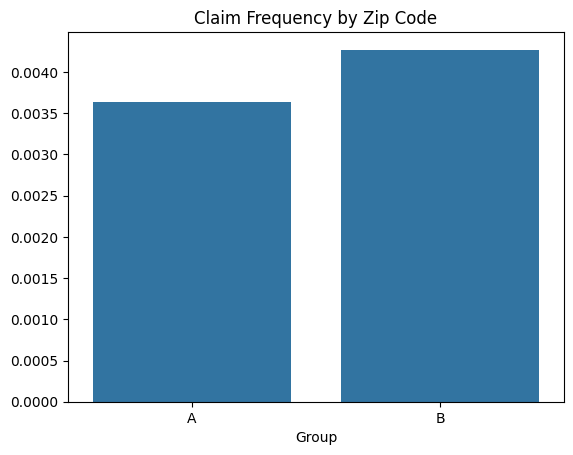

C:\Users\pc\Desktop\KAIM\insurance-risk-analytics-w3\src\tests\ab_tests.py:68: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  values = df_ab.groupby("Group").apply(metric_func).reset_index(name="value")


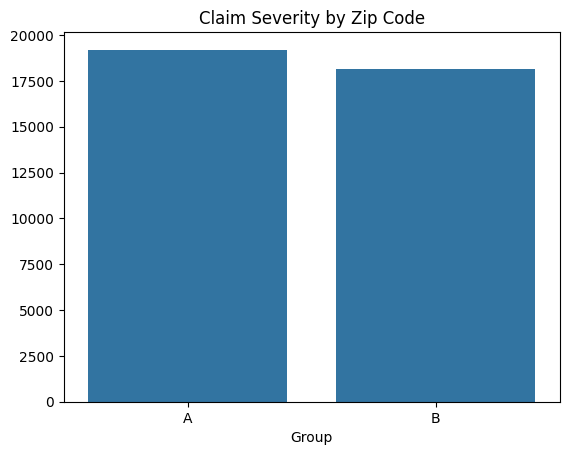

In [41]:
# --- Visualizations ---
plot_metric_by_group(df_ab, calculate_claim_frequency, "Claim Frequency by Zip Code")
plot_metric_by_group(df_ab, calculate_claim_severity, "Claim Severity by Zip Code")

We fail to reject the null hypothesis for postal codes (p > 0.05). Specifically, claim frequency in zip code 2000 (0.28%) is nearly identical to that in zip code 122 (0.27%), and the difference is not statistically significant.

This suggests that policyholders in these two areas exhibit similar claim behavior. As such, there is no strong justification for adjusting base premiums based solely on these two zip codes. However, further investigation across a broader set of postal codes may reveal more meaningful geographic risk patterns.